<h2 align="center">Лабораторна робота №3</h2>
<h5 align="center"><i>Роботу виконала студентка групи ФІ-21, Денисенко Анастасія</i></h5>
<p><b>Тема роботи:</b> "«Застосування алгоритмів і методів ройового інтелекту до розв’язування оптимізаційних задач з обмеженнями у вигляді диференціальних рівнянь та їх систем".</p>
<p><b>Мета роботи:</b> опанувати принципи роботи наведених у роботі алгоритмів ройового інтелекту (метод зозулі; метод кажанів), опис яких наведено у даній роботі. Розробити відповідне програмне забезпечення знаходження оптимальних розв’язків наведених у роботі задач.</p>

### Завдання до лабораторної роботи

1. Ознайомитись з теоретичними відомостями до кожного з розглянутих методів (метод пошуку екстремуму зграєю зозуль, метод пошуку екстремуму зграєю кажанів).
2. Розробити програмне забезпечення (мова програмування і середовище розробки за вибором студента) для тестування знаходження глобального екстремуму функцій з четвертого розділу роботи (для функції Растринга взяти $n=20$). Протестувати кожен з розглянутих методів на даних функціях. Подати результати тестування у вигляді графіків, як і у попередніх роботах. Кількість запусків програмного застосунку для 2-х алгоритмів будь-яке (на вибір студента).
3. Модивфікувати відповідні програми для знаходження розв'язку будь-якої задачі з підрозділу 5.1. Показати динаміку збіжності обраного методу на обраній задачі, навести графічно відповідний розв'язок задач та числові параметри, які демонструють достатню збіжність методу на задачі. У якості цільової функції взяти:
    - $f(\alpha)=|x(t=b;\alpha) - B|$
    - $f(\alpha)=(x(t=b;\alpha) - B)^2$,
        де $b$ - значення аргументу на границі, $B$ - потрібне значення функції на границі $t=b$ для деякого значення $\alpha$.
   Оцінити графічно, наскільки ефективно працюють методи для різних цільових функцій.
5. Модифікувати відповіді програми для знаходження розв'язку будь-якої задачі з підрозділу 5.2. Показати динаміку збіжності обраного методу на обраній задачі, навести графічно відповідний розв'язок задач та числові параметри, які демонструють достатню збіжність методу на задачі. У якості цільової функції взяти:
    - $f(\alpha;\beta)=m|x(b;\alpha;\beta)-A|+n|y(b;\alpha;\beta)-B|;$
    - $f(\alpha;\beta)=m(x(b;\alpha;\beta)-A)^2+n(y(b;\alpha;\beta)-B)^2$, де $b$ - значення аргументу на границі; $A$ - потрібне значення функції на границі $t=b$ функції $x(t)$ для пари $(\alpha;\beta)$; $B$ - потрібне значення функції на границі $t=b$ функції $y(t)$ для пари $(\alpha;\beta)$; m $\in$ $R^+$,n $\in$ $R^+$.
    - $f(\alpha;\beta)=\max(m|x(b;\alpha;\beta) - A|; n|y(b;\alpha;\beta)-B|)$, де $b$ - значення аргументу на границі; $A$ - потрібне значення функції на границі $t=b$ функції $x(t)$ для пари $(\alpha;\beta)$; $B$ - потрібне значення функції на границі $t=b$ функції $y(t)$ для пари $(\alpha;\beta)$; m $\in$ $R^+$,n $\in$ $R^+$.
6. Оцінити графічно, наскільки ефективно працюють методи для різних цільових функцій.
7. Зробит висновки до отриманих результатів

In [1]:
import numpy as np
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import random
from functions import *  
from copy import deepcopy

In [15]:
class Cuculus_optimization:
    def __init__(self, func, p_detect, delta, iter, size_pop, limitations, minimize = True):
        if delta >= 1 or delta <= 0:
            raise ValueError("The value of delta has to be in (0, 1), but given value is: {delta}".format(delta = delta))
        self.func = func
        self.p_detect = p_detect
        self.delta = delta
        self.iter = iter
        self.size_pop = size_pop
        self.limitations = limitations
        self.minimize = minimize
        self.M = len(self.limitations)
        self.x_ideals = [self.limitations[i][0] for i in range(self.M)]
        self.pop = self.create_first_population()

    def create_first_population(self):
        pop = []
        for i in range(self.M):
            lim = self.limitations[i]
            xs = np.arange(lim[0], lim[1], abs(lim[0] - lim[1])/self.size_pop**2)
            xs = xs.reshape((self.size_pop, self.size_pop))
            pop.append(xs)
        return pop
    
    def choose_nest(self):
        return int(np.around((self.size_pop - 1)*random.uniform(0, 1), decimals=0))
    
    def put_in_boudry(self, i, j, k):
        min = self.limitations[i][0]
        max = self.limitations[i][1]
        diff = abs(min - max)
        if self.pop[i][j][k] >= max or self.pop[i][j][k] <= min:
            self.pop[i][j][k] = ((self.pop[i][j][k] - min) % diff + diff) % diff + min

    def update_positions(self):
        for i in range(self.M):
            min = self.limitations[i][0]
            max = self.limitations[i][1]
            diff = abs(min - max)
            ideals = deepcopy(self.x_ideals)
            for j in range(self.size_pop):
                for k in range(self.size_pop):
                    self.pop[i][j][k] = self.pop[i][j][self.choose_nest()] + self.delta * diff * (2*random.uniform(0, 1) - 1)
                    self.put_in_boudry(i, j, k)
                    all_dims = [i[j] for i in self.pop]
                    if np.mean(self.func(all_dims)) <= np.mean(self.func(self.x_ideals)) and self.minimize:
                        ideals[i] = self.pop[i][j][k]
                    elif np.mean(self.func(all_dims)) >= np.mean(self.func(self.x_ideals)) and not self.minimize:
                        ideals[i] = self.pop[i][j][k]
            self.x_ideals = ideals
        return self.x_ideals

    def find_worst(self, i):
        others = [self.pop[k][0] for k in range(0, self.M)]
        if self.minimize:
            worst = self.func(others)
            worst_index = 0
            for j in range(1, self.size_pop):
                others[i] = self.pop[i][j]
                other_func = self.func(others)
                if np.mean(other_func) > np.mean(worst):
                    worst = self.pop[i][j]
                    worst_index = j
        
        else:
            worst = self.func(others)
            worst_index = 0
            for j in range(1, self.size_pop):
                others[i] = self.pop[i][j]
                other_func = self.func(others)
                if np.mean(other_func) < np.mean(worst):
                    worst = self.pop[i][j]
                    worst_index = j
        return worst_index
            
    def modify_worst(self):
        if random.uniform(0, 1) < self.p_detect:
            return 
        else:
            for i in range(self.M):
                min = self.limitations[i][0]
                max = self.limitations[i][1]
                diff = abs(min - max)
                self.pop[i][self.find_worst(i)] += self.delta * diff * (2*random.uniform(0, 1) - 1)
                for k in self.pop[i][self.find_worst(i)]:
                    if k > max or k < min:
                        k = ((k - min) % diff + diff) % diff + min

    def run(self):
        all_ideals = []
        for _ in range(self.iter):
            self.x_ideals = self.update_positions()
            all_ideals.append(self.x_ideals)
            self.modify_worst()
        return all_ideals
    
    def plot(self):
        all_ideals = self.run()
        plt.plot([j for j in range(self.iter)], [self.func(np.array(row)) for row in all_ideals])
        plt.grid()
        plt.show()

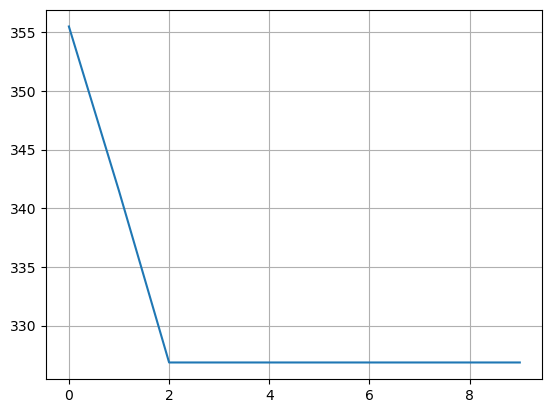

In [35]:
co_rastring = Cuculus_optimization(rastring, 0.4, 0.5, 10, 10, [[[-5.12, 5.12]]*20][0], minimize = True)
co_rastring.plot()

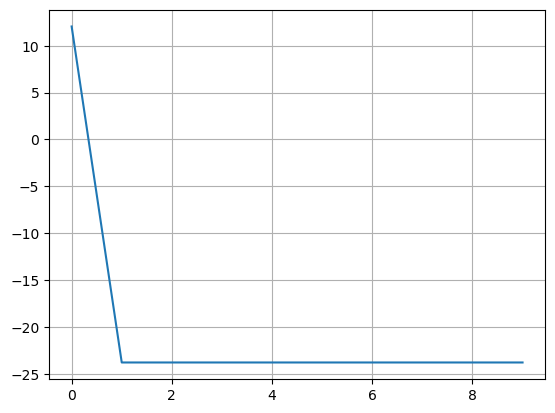

In [19]:
co_mishra_bird = Cuculus_optimization(mishra_bird, 0.4, 0.5, 10, 10, [[-10, 0], [-6.5, 0]], minimize = True)
co_mishra_bird.plot()

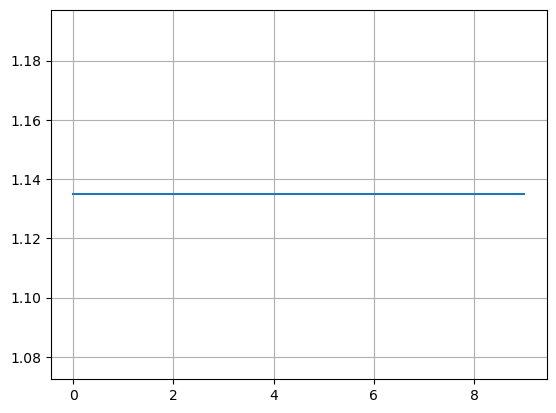

In [39]:
co_absolute = Cuculus_optimization(absolute, 0.4, 0.5, 10, 10, [[-3, 3]], minimize = True)
co_absolute.plot()

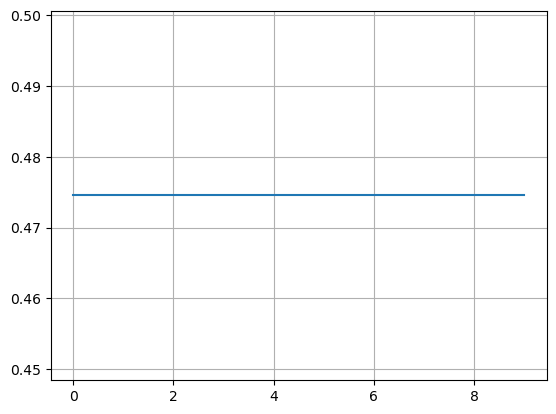

In [41]:
co_squared = Cuculus_optimization(squared, 0.4, 0.5, 10, 10, [[-3, 3]], minimize = True)
co_squared.plot()

In [25]:
class Bat_optimization:
    def __init__(self, func, size_pop, iter, r, A, alpha, gamma, delta, f_min, f_max, limitations, minimize = True):
        if A > 2 or A < 1:
            raise ValueError("The value of A has to be in range [1, 2], but given value is {A}".format(A = A))
        if alpha <= 0 or alpha >= 1:
            raise ValueError("The value of alpha has to be in range (0, 1), but given value is {a}".format(a = alpha))
        if r < 0 or r > 1:
            raise ValueError("The value of r has to be in range [0, 1], but given value is {r}".format(r = r))
        if gamma <= 0 or gamma >= 1:
            raise ValueError("The value of gamma has to be in range (0, 1), but given value is {g}".format(g = gamma))
        if delta <= 0 or delta >= 1:
            raise ValueError("The value of delta has to be in range (0, 1), but given value is {d}".format(d = delta))
        if f_min < 0:
            raise ValueError("The value of f_min has to be greater than 0, but given value is {f}".format(f = f_min))
        if f_max <= f_min:
            raise ValueError("The value of f_max has to be greater than f_min, but given values are f_min: {f} and f_max {f1}".format(f = f_min, f1 = f_max))
        
        self.func = func
        self.size_pop = size_pop
        self.iter = iter
        self.r = r
        self.A = A
        self.alpha = alpha
        self.gamma = gamma
        self.delta = delta
        self.f_min = f_min
        self.f_max = f_max
        self.limitations = limitations
        self.minimize = minimize
        self.M = len(self.limitations)
        self.pop = self.create_first_population()
        self.x_ideals = [self.limitations[i][0] for i in range(self.M)]
        self.velocity = [np.full((self.size_pop, self.size_pop), 0)]*self.M
        self.fk = self.f_min
        self.curr_iter = 0

    def create_first_population(self):
        pop = []
        for i in range(self.M):
            lim = self.limitations[i]
            xs = np.arange(lim[0], lim[1], abs(lim[0] - lim[1])/self.size_pop**2)
            xs = xs.reshape((self.size_pop, self.size_pop))
            pop.append(xs)
        return pop
    
    def put_in_boudry(self, i, j, k):
        min = self.limitations[i][0]
        max = self.limitations[i][1]
        diff = abs(min - max)
        if self.pop[i][j][k] >= max or self.pop[i][j][k] <= min:
            self.pop[i][j][k] = ((self.pop[i][j][k] - min) % diff + diff) % diff + min

    def update_f_v_x(self):
        self.fk = self.f_min + (self.f_max - self.f_min)*random.uniform(0, 1)
        for i in range(self.M):
            for j in range(self.size_pop):
                for k in range(self.size_pop):
                    self.velocity[i][j][k] += (self.x_ideals[i] - self.pop[i][j][k])*self.fk
                    self.pop[i][j][k] += self.velocity[i][j][k]
                    self.put_in_boudry(i, j, k)

    def x_curr(self):
        for i in range(self.M):
            min = self.limitations[i][0]
            max = self.limitations[i][1]
            diff = abs(min - max)
            ideals = deepcopy(self.x_ideals)
            for j in range(self.size_pop):
                for k in range(self.size_pop):
                    x_curr = self.pop[i][j][k] + self.delta * diff * (2*random.uniform(0, 1) - 1)
                    if x_curr >= max or x_curr <= min:
                        x_curr = ((x_curr - min) % diff + diff) % diff + min
                    tmp = np.array([[self.pop[l][j][k]] for l in range(self.M)])
                    tmp[i] = x_curr
                    if self.minimize and self.func(tmp) < self.func(np.array([self.pop[l][j][k] for l in range(self.M)])):
                        if random.uniform(0, 1) < self.A:
                            self.pop[i][j][k] = x_curr
                            self.A *= self.alpha
                            self.r *= (1 - np.e**(-self.gamma*self.curr_iter))
                        if self.func(tmp) < self.func(np.array([[i] for i in ideals])):
                            ideals[i] = x_curr
                    elif not self.minimize and self.func(tmp) > self.func(np.array([[self.pop[l][j][k]] for l in range(self.M)])):
                        if random.uniform(0, 1) < self.A:
                            self.pop[i][j][k] = x_curr
                            self.A *= self.alpha
                            self.r *= (1 - np.e**(-self.gamma*self.curr_iter))
                        if self.func(tmp) > self.func(np.array([[i] for i in ideals])):
                            ideals[i] = x_curr
            self.x_ideals = ideals

    def run(self):
        all_ideals = []
        for _ in range(self.iter):
            self.update_f_v_x()
            self.x_curr()
            all_ideals.append(self.x_ideals)
        return all_ideals
    
    def plot(self):
        all_ideals = self.run()
        plt.plot([j for j in range(self.iter)], [self.func(row) for row in all_ideals])
        plt.grid()
        plt.show()

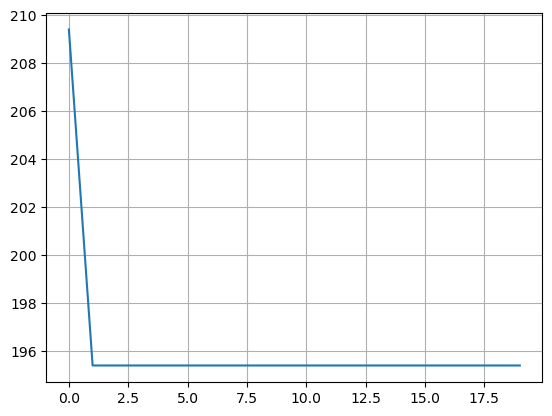

In [27]:
bo_rastring = Bat_optimization(rastring, 20, 20, 1, 1.5, 0.9, 0.6, 0.5, 0.1, 3, [[[-5.12, 5.12]]*20][0], minimize = True)
bo_rastring.plot()

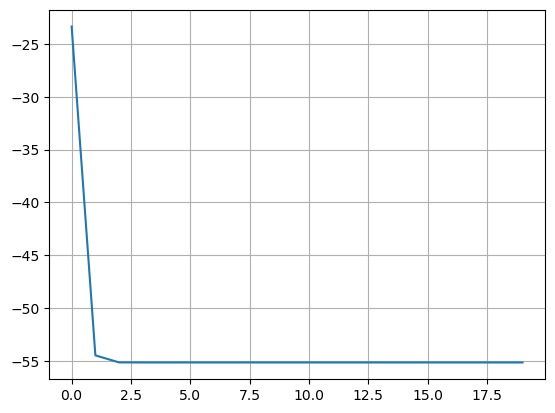

In [28]:
bo_mishra_bird = Bat_optimization(mishra_bird, 20, 20, 1, 1.5, 0.9, 0.6, 0.5, 0.1, 3, [[-10, 0], [-6.5, 0]], minimize = True)
bo_mishra_bird.plot()

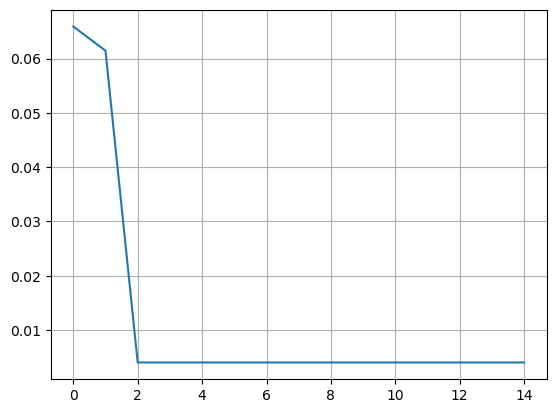

In [29]:
bo_absolute = Bat_optimization(absolute, 10, 15, 1, 1.5, 0.9, 0.6, 0.5, 0.1, 3, [[-3, 3]], minimize = True)
bo_absolute.plot()

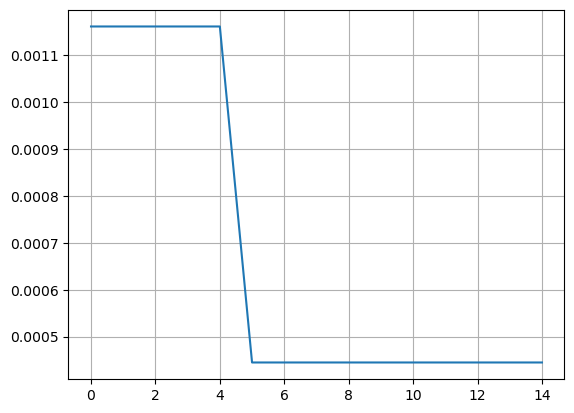

In [30]:
bo_squared = Bat_optimization(squared, 10, 15, 1, 1.5, 0.9, 0.6, 0.5, 0.1, 3, [[-3, 3]], minimize = True)
bo_squared.plot()

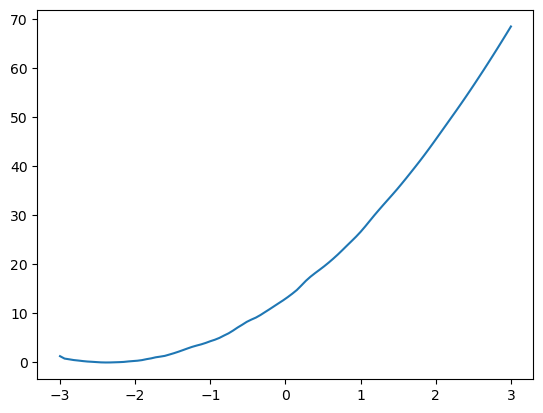

In [9]:
plt.plot(alpha, y_square)
plt.show()

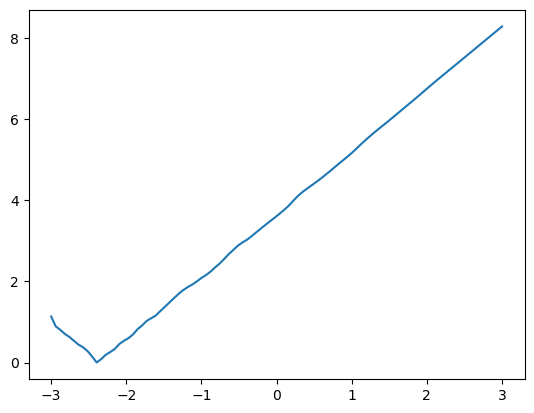

In [11]:
plt.plot(alpha, y_abs)
plt.show()